## 상권분석 - 코로나 유동인구
### 1. 데이터 불러오기

In [1]:
import pandas as pd
import math
import mpl_toolkits
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import font_manager, rc
rc('font', family='HCR Dotum')

In [2]:
# 유동인구 데이터(fpopl.csv) 불러오기
pop = pd.read_csv("C:/Users/juyeo/Desktop/store/KT_data_20200717/fpopl.csv")

In [3]:
len(pop)
pop

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6
...,...,...,...,...,...,...
47546438,20200616,23,F,age_70,11500593,38
47546439,20200616,23,M,age_70,11350624,28
47546440,20200616,23,M,age_70,11305534,47
47546441,20200616,23,F,age_70,11500604,50


In [4]:
# 지역코드 데이터(adstrd_master.csv) 불러오기
code = pd.read_csv("C:/Users/juyeo/Desktop/store/KT_data_20200717/adstrd_master.csv")

In [5]:
code

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515.0,청운효자동,서울특별시,종로구
1,11110530.0,사직동,서울특별시,종로구
2,11110540.0,삼청동,서울특별시,종로구
3,11110550.0,부암동,서울특별시,종로구
4,11110560.0,평창동,서울특별시,종로구
...,...,...,...,...
3488,50130580.0,서홍동,제주특별자치도,서귀포시
3489,50130590.0,대륜동,제주특별자치도,서귀포시
3490,50130600.0,대천동,제주특별자치도,서귀포시
3491,50130610.0,중문동,제주특별자치도,서귀포시


In [6]:
# 지역코드 데이터에서 원하는 자치구의 구역코드들 저장 (인덱스 초기화 drop=True)

def get_gucodes(word):
    
    codes = code[code['signgu_nm'] == word]['adstrd_code'].reset_index(drop=True)
    
    return codes

In [7]:
# 유동인구 데이터에서 자치구 구역코드들과 맞는 데이터 추출, 필요 없는 열(날짜, 성별, 지역코드) 제거

def get_gulist(word):
    
    codes = get_gucodes(word)
    
    gulist = []
    cdlist = []
    
    for i in codes:
        cdlist.append(i)
    
    gulist = pop[(pop['adstrd_code'] >= cdlist[0]) & (pop['adstrd_code'] <= cdlist[-1])].reset_index(drop=True)
    gulist.drop(['base_ymd', 'sexdstn_se_code', 'adstrd_code'], 1)
    
    return gulist

In [8]:
# 최종 dataframe 얻는 함수
# 자치구의 시간대, 연령대별 평균 유동인구 수 dataframe으로 저장

def get_df(word):
    
    gulist = get_gulist(word)
        
    time = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    age = ['age_00', 'age_10', 'age_15', 'age_20', 'age_25', 'age_30', 'age_35', 'age_40', 'age_45', 'age_50', 'age_55', 'age_60', 'age_65',  'age_70']
    age_num = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
    
    means = []
    
    for j in age:
        row = []
        for i in time:
            num = gulist[(gulist['tmzon_se_code'] == i) & (gulist['agrde_se_code'] == j)]['popltn_cascnt'].mean() // 1
            row.append(num)
        means.append(row)
        
    #df = pd.DataFrame(means, columns = ['time', 'age', 'pop', 'age_num'])  
    
    return means

In [9]:
# 3D 그래프 그리는 함수

def get_plot(word):
    
    # 눈금 index 할때 쓸것
    time = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
    age = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69',  '70-']

    get_ipython().run_line_magic('matplotlib', 'nbagg')

    x = np.array(range(0, 24), float)
    y = np.array(range(0, 14), float)
    xpos, ypos = np.meshgrid(x, y)

    z= np.array(get_df(word))

    xpos = xpos.flatten()
    ypos = ypos.flatten()
    # colors = ["b", "g", "crimson"]
    zpos = np.zeros_like(xpos)
    dx = 0.5*np.ones_like(zpos)
    dy = dx.copy()
    dz = z.flatten()

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection = "3d")

    ax.set_xlabel("time")
    ax.set_ylabel("ages")
    ax.set_zlabel("population")
    
    ax.set_xticks(range(24))
    ax.set_xticklabels(time)
    
    ax.set_yticks(range(14))
    ax.set_yticklabels(age)

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = "skyblue")
    plt.show()

<IPython.core.display.Javascript object>


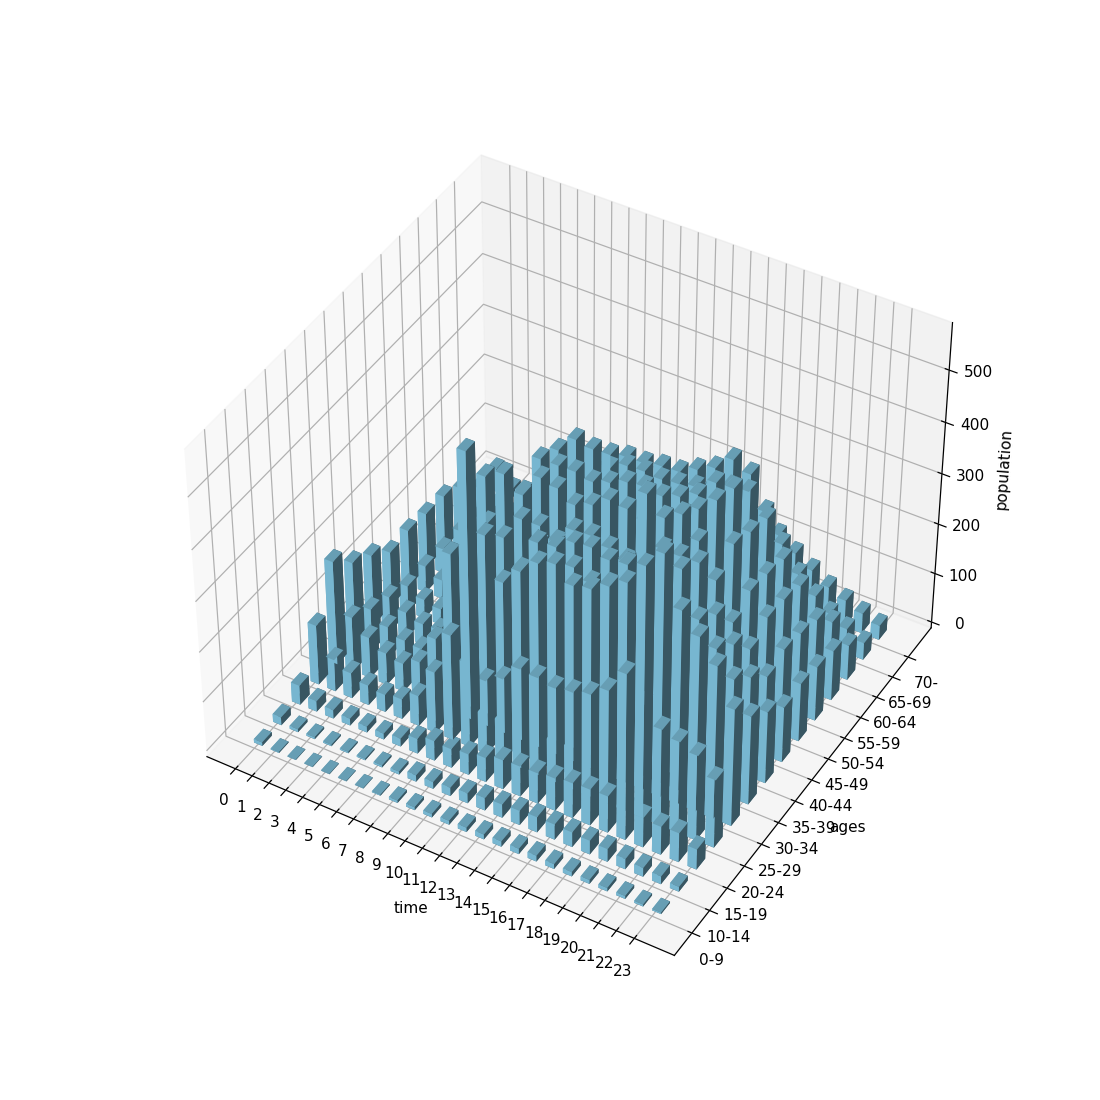

In [14]:
get_plot('금천구')